In [69]:
CMAP = "Blues"
import warnings
warnings.filterwarnings('ignore')

# Water Product Interoperability  


TODO

### Current Water products  

Interoperability is explored across three derived water products from `Sentinel 1`, `Sentinel 2` and `Landsat 8`. The classification and initial data-exploration is conducted in separate notebooks listed below: 

   - `Sentinel 1`- [link]()    
   A thresholding algorthim takes advantage of linear class separability on vv and vh bands to classify water.  
     
     
   - `Landsat 8`- [link]()    
   The Water Observations From Space(WOFS) algorithm is applied to Landsat8 imagery. WOFS uses a decision tree on surface reflectance features.    
   
   
   - `Sentinel 2`- [link]()    
   The Water Observations From Space(WOFS) algorithm is applied to Sentinel 2 imagery. While the original WOFS algorithm was trained and calibrated on Landsat 7 imagery, relatively consistent results are expected from a re-application on Sentinel 2 imagery and are tolerated for the purpose of exploring interoperability.     
   
The outputs of these notebooks are temporarily saved into corressponding `netcdf` files. To properly run this notebook. Ensure that the notebooks listed above have been run.  


### Loading Water Products  

The following code lists the paths for three water products and loads them into the notebook.  

In [229]:
from pathlib import Path
# Define dataset file paths
DATA_DIR = Path('output/netcdfs')
DATASETS = {
    'l8': DATA_DIR / 'landsat8_nbar' / 'l8_wofs.nc',
    's1': DATA_DIR / 'sentinel_1_gamma' / 'water_classify2.nc',
    's2': DATA_DIR / 'sentinel_2_ab' / 'wofs_s2ab.nc'
}

In [230]:
import xarray as xr 
# Load datasets
datasets = {name: xr.open_dataset(path) for name, path in DATASETS.items()}
print('Loaded datasets: {}'.format(', '.join(datasets.keys())))

Loaded datasets: l8, s1, s2


In [231]:
import functools as fct
merged = fct.reduce(lambda ds_a, ds_b: ds_a.merge(ds_b), datasets.values())

In [232]:
merged

<xarray.Dataset>
Dimensions:     (time: 102, x: 836, y: 988)
Coordinates:
  * time        (time) datetime64[ns] 2017-01-05T00:02:28 ...
  * x           (x) float64 1.564e+06 1.564e+06 1.564e+06 1.564e+06 ...
  * y           (y) float64 -3.955e+06 -3.955e+06 -3.955e+06 -3.955e+06 ...
Data variables:
    crs         int32 -2147483647
    wofs        (time, y, x) float64 nan nan nan nan nan nan nan nan nan nan ...
    vv          (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    vh          (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    vv_plus_vh  (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
    vh_over_vv  (time, y, x) float32 nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    date_created:           2019-02-11T23:55:52.483248
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.1...
    geospatial_bounds:      POLYGON ((149.276140053401 -35.243873622

### Areas of Investigation and Measures of Interoperability

- **Availability**
- **Variability**
- **Visual Interpretability**


Each xarray contains a variable called `wofs` that houses water classifications from the classifiers. Values in these xarray assume one of three values. `1`,`0` for water and not-water as well as `nan` values for areas occluded by cloud or are missing data.  

# Lake George

In [20]:
latitudes = (-35.217575569215505, -34.97543887925878) 
longitudes = (149.2719268798828, 149.5095062255859)

In [21]:
display_map(latitude = latitudes, longitude = longitudes)

### An annual extent derived from merged products

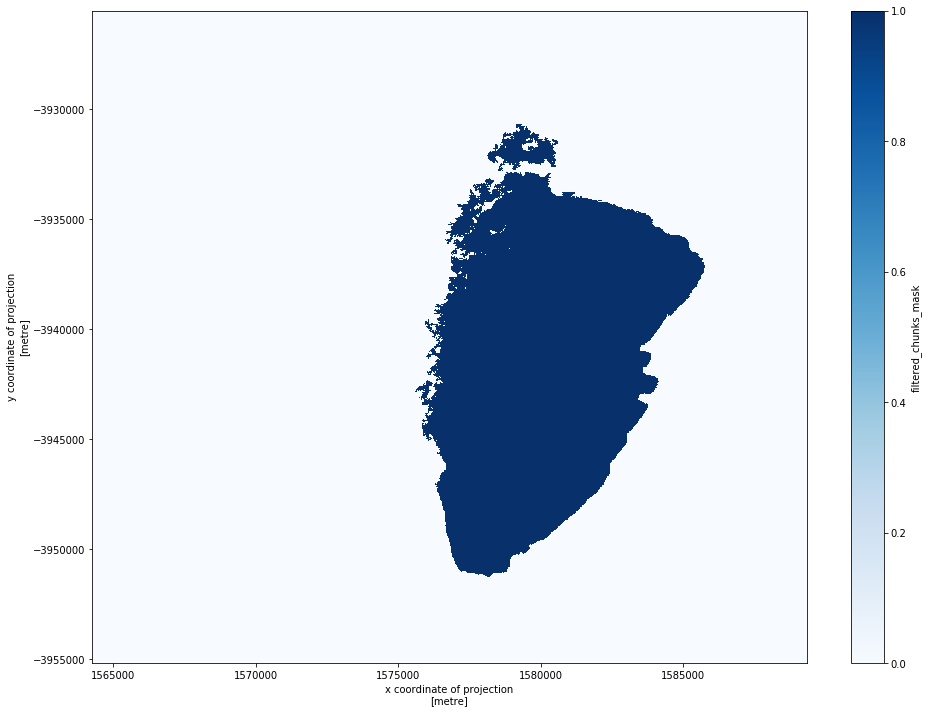

In [233]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize = (16,12))
extract_large_body_from_boolean_xarray(merged.wofs).plot(cmap = CMAP)

In [234]:
#existing wofs product lake george

In [235]:
lake_george = extract_large_body_from_boolean_xarray(merged.wofs)

# Annual Summary Products  

Something about annual summary products. 

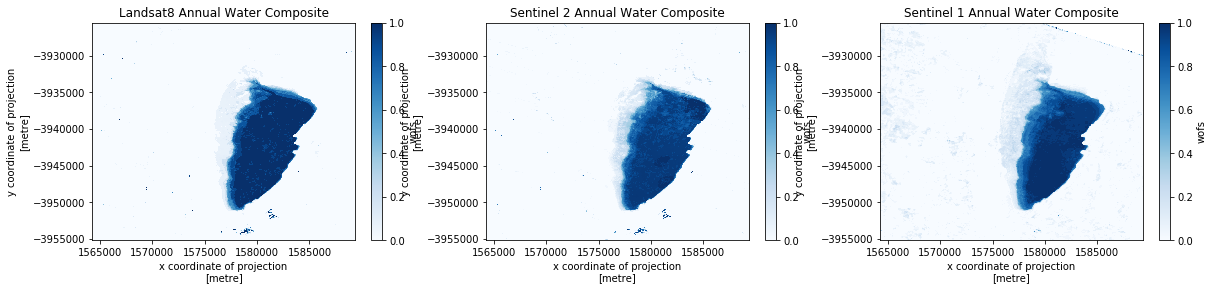

In [236]:
fig, axes = plt.subplots(1,3, figsize = (20,4))

a = datasets["l8"].mean(dim = "time", skipna = True).wofs
b = datasets["s2"].mean(dim = "time", skipna = True).wofs
c = datasets["s1"].mean(dim = "time", skipna = True).wofs

a.plot(ax=axes[0], cmap = CMAP)
axes[0].set_title("Landsat8 Annual Water Composite")

b.plot(ax=axes[1], cmap = CMAP)
axes[1].set_title("Sentinel 2 Annual Water Composite")

c.plot(ax=axes[2], cmap = CMAP)
axes[2].set_title("Sentinel 1 Annual Water Composite")

plt.show()

In [237]:
# Existing Annual Wofs product

In [238]:
# Most interesting thing from an applications perspective is hthe highest frequency product is

# Interoperability anaylis

In [239]:
# Integrated Annual product (Merged.mean.plot). Hey look you can take a naive approach to integrating all proucts. And fold that into a n enriched annual product.   
#AND THEN COMPARE TO ANNUAL SUMARY

In [240]:
# It's not that simple Let's take a look at the distribution of acquisitions. 

In [241]:
plot_availability(datasets)

# Sentinel 2  

Sentinel 2 has many acquisitions and is missing data due to clouds.  

In [242]:
create_movie_on_np_array(np.flip(datasets["s2"].wofs.values, axis = [1]), text = [*map(str, datasets["s2"].wofs.time.values)], cmap = "magma")

# Landsat 8

In [245]:
create_movie_on_np_array(np.flip(datasets["l8"].wofs.values,axis = [1]), text = [*map(str, datasets["l8"].wofs.time.values)], cmap = "magma")

# Sentinel 1

Sentinel 1 is noisy

In [247]:
create_movie_on_np_array(np.flip(datasets["s1"].wofs.values, axis = [1, 2]), text = [*map(str, datasets["s1"].wofs.time.values)], cmap = "magma")

# Merged Time Series

In [249]:
from functools import reduce 
create_movie_on_np_array(np.flip(merged.wofs.values, axis = [1]), cmap = "magma")

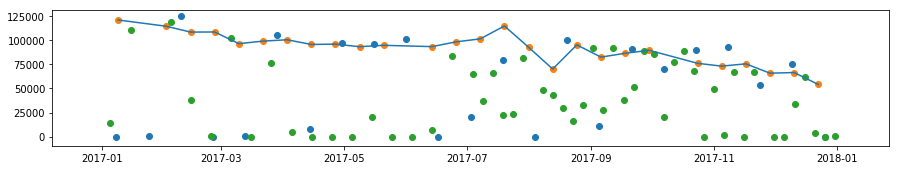

In [250]:
plt.figure(figsize = (15,2.5))

ts_l8 = datasets["l8"].where(lake_george).sum(dim = ['x', 'y'], skipna = True).wofs  
ts_s1 = datasets["s1"].where(lake_george).sum(dim = ['x', 'y'], skipna = True).wofs  
ts_s2 = datasets["s2"].where(lake_george).sum(dim = ['x', 'y'], skipna = True).wofs  



plt.scatter(ts_l8.time.values, ts_l8.values)
plt.scatter(ts_s1.time.values, ts_s1.values)
plt.plot(ts_s1.time.values, ts_s1.values)

plt.scatter(ts_s2.time.values, ts_s2.values)

In [194]:
(~np.isnan(resampled_l8)).mean(dim = ['y', 'x']).values

array([0.09762848, 1.        , 0.99958957, 0.97024824, 0.99676501,
       0.06665512, 0.49610639, 0.99991767, 0.9990157 , 0.99486421,
       0.99966948, 0.99989709])

In [8]:
import folium
import itertools    
import math
import numpy as np  

def _degree_to_zoom_level(l1, l2, margin = 0.0):
    
    degree = abs(l1 - l2) * (1 + margin)
    zoom_level_int = 0
    if degree != 0:
        zoom_level_float = math.log(360/degree)/math.log(2)
        zoom_level_int = int(zoom_level_float)
    else:
        zoom_level_int = 18
    return zoom_level_int

def display_map(latitude = None, longitude = None, resolution = None):
    """ Generates a folium map with a lat-lon bounded rectangle drawn on it. Folium maps can be 
    
    Args:
        latitude   (float,float): a tuple of latitude bounds in (min,max) format
        longitude  ((float, float)): a tuple of longitude bounds in (min,max) format
        resolution ((float, float)): tuple in (lat,lon) format used to draw a grid on your map. Values denote   
                                     spacing of latitude and longitude lines.  Gridding starts at top left 
                                     corner. Default displays no grid at all.  
    Returns:
        folium.Map: A map centered on the lat lon bounds. A rectangle is drawn on this map detailing the
        perimeter of the lat,lon bounds.  A zoom level is calculated such that the resulting viewport is the
        closest it can possibly get to the centered bounding rectangle without clipping it. An 
        optional grid can be overlaid with primitive interpolation.  
    .. _Folium
        https://github.com/python-visualization/folium
    """
    
    assert latitude is not None
    assert longitude is not None

    ###### ###### ######   CALC ZOOM LEVEL     ###### ###### ######

    margin = -0.5
    zoom_bias = 0
    
    lat_zoom_level = _degree_to_zoom_level(margin = margin, *latitude ) + zoom_bias
    lon_zoom_level = _degree_to_zoom_level(margin = margin, *longitude) + zoom_bias
    zoom_level = min(lat_zoom_level, lon_zoom_level) 

    ###### ###### ######   CENTER POINT        ###### ###### ######
    
    center = [np.mean(latitude), np.mean(longitude)]

    ###### ###### ######   CREATE MAP         ###### ###### ######
    
    map_hybrid = folium.Map(
        location=center,
        zoom_start=zoom_level, 
        tiles=" http://mt1.google.com/vt/lyrs=y&z={z}&x={x}&y={y}",
        attr="Google"
    )
    
    ###### ###### ######     BOUNDING BOX     ###### ###### ######
    
    line_segments = [(latitude[0],longitude[0]),
                     (latitude[0],longitude[1]),
                     (latitude[1],longitude[1]),
                     (latitude[1],longitude[0]),
                     (latitude[0],longitude[0])
                    ]
    
    
    
    map_hybrid.add_child(
        folium.features.PolyLine(
            locations=line_segments,
            color='red',
            opacity=0.8)
    )

    map_hybrid.add_child(folium.features.LatLngPopup())        

    return map_hybrid

In [9]:
import xarray as xr 

In [10]:
from skimage import measure
import numpy as np

def group_pixels(array, connectivity = 1):
    arr = measure.label(array, connectivity=connectivity)
    return [np.dstack(np.where(arr == y))[0] for y in range(1,np.amax(arr))]

def numpy_group_mask(boolean_np_array, min_size = 5):  
    all_groups = group_pixels(boolean_np_array.astype(int))
    candidate_groups = filter(lambda group:
                                  (len(group) > min_size) & (group != 0).all(),
                                  all_groups)
    candidate_pixels = (pixel for group in candidate_groups for pixel in group)  
    dynamic_array = np.zeros(boolean_np_array.shape) 
    for x,y in candidate_pixels:
        dynamic_array[x][y] = 1  
    return dynamic_array.astype(bool)


def boolean_xarray_segmentation_filter(da,  min_size = 5):
    mask_np = numpy_group_mask(da.values,min_size = min_size)
    return xr.DataArray(mask_np,
                        dims = da.dims,
                        coords = da.coords,
                        attrs = {"group_size": min_size},
                        name = "filtered_chunks_mask")


In [11]:
def extract_large_body_from_boolean_xarray( da:xr.DataArray,
                                            frequency_percentile:float = 0.0625,
                                            min_number_of_pixels:int = 1000):

    body = (da.mean(dim = "time") > frequency_percentile)
    return boolean_xarray_segmentation_filter(body, min_size= min_number_of_pixels)
    

# Availability

In [12]:
from calendar import month_name
import numpy as np
import xarray as xr
from pathlib import Path
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook
from bokeh.core.properties import value
from bokeh.transform import dodge
from bokeh.models import Label
from bokeh.palettes import Accent6, Dark2, Category10
from bokeh.colors.named import darkgray

In [13]:
output_notebook()

Loading BokehJS ...

**Acquisition Count Per Month**

In [33]:
# Calculate frequencies per months. Months with no data are handled by combining with
# an empty `all_months` data array. 
coords={'month': range(1, 13)}
months_str = [m[:3] for m in list(month_name)[1:]]
frequencies = {}
for name, dataset in datasets.items():
    freq = dataset.time.groupby('time.month').count('time')
    all_months = xr.DataArray(data = [0]*12, coords=coords, dims=coords, name='time')
    frequencies[name] = freq.combine_first(all_months).assign_coords(month=months_str)

In [ ]:
# Calculate the aggregated value for each month
aggregated = np.sum([freq.values for freq in frequencies.values()], axis=0)
aggregated

In [ ]:
import matplotlib.pyplot as plt  
from functools import reduce
merged_product = reduce(lambda dsa, dsb: dsa.merge(dsb), datasets.values()) 

In [ ]:
plt.figure(figsize = (10,8))
lake_george = (merged_product.wofs.mean(dim = "time") > .0625)

In [15]:
from skimage import measure
import numpy as np

def group_pixels(array, connectivity = 1):
    arr = measure.label(array, connectivity=connectivity)
    return [np.dstack(np.where(arr == y))[0] for y in range(1,np.amax(arr))]

def numpy_group_mask(boolean_np_array, min_size = 5):  
    all_groups = group_pixels(boolean_np_array.astype(int))
    candidate_groups = filter(lambda group:
                                  (len(group) > min_size) & (group != 0).all(),
                                  all_groups)
    candidate_pixels = (pixel for group in candidate_groups for pixel in group)  
    dynamic_array = np.zeros(boolean_np_array.shape) 
    for x,y in candidate_pixels:
        dynamic_array[x][y] = 1  
    return dynamic_array.astype(bool)


def boolean_xarray_segmentation_filter(da,  min_size = 5):
    mask_np = numpy_group_mask(da.values,min_size = min_size)
    return xr.DataArray(mask_np,
                        dims = da.dims,
                        coords = da.coords,
                        attrs = {"group_size": min_size},
                        name = "filtered_chunks_mask")


In [16]:
def meter_to_pixel(meter:int, resolution = None) -> int:
    return meter/resolution

In [40]:
from IPython.display import HTML, display, Image
from tempfile import NamedTemporaryFile
import matplotlib.pyplot as plt
plt.rcParams["animation.html"] = "jshtml"
import matplotlib.animation as animation
from skimage.transform import resize as imresize
%matplotlib inline

def create_movie_on_np_array(frames,
                 title = "",
                 text=None,
                 fps=5,
                 width=10,
                 height=5,
                 align=True,
                 alphas=None, 
                 cmap = "Blues"):
    
    if text is None:
        text = ['' for s in range(len(frames))]
    
    ref_shape = frames[0].shape
    
    fig, ax = plt.subplots()
    ax.set_title = title + "\n" + text[0]
    
    ax.set_aspect('equal')
    ax.axis('off')
    
    im = ax.imshow(frames[0], cmap = cmap)
    _text = ax.text(20, 100, text[0], fontsize=14, color='white')
    im.set_clim([0,1])
    fig.set_size_inches([width,height])
    plt.tight_layout()
    
    def update_img(n):
        frame = imresize(frames[n], ref_shape, order=3)
    
        _text.set_text(text[n])
        im.set_data(frame)
        return im,
    
    def init():
        im.set_data(frames[0])
        return im,
       
    anim = animation.FuncAnimation(fig, update_img, len(frames), init_func=init, interval=1000);
        
    plt.close(anim._fig)
    return display(HTML(anim.to_jshtml()));

In [ ]:
from typing import Dict
def plot_availability(data: Dict[str, xr.Dataset]):
    
    coords={'month': range(1, 13)}
    months_str = [m[:3] for m in list(month_name)[1:]]
    frequencies = {}
    for name, dataset in datasets.items():
        freq = dataset.time.groupby('time.month').count('time')
        all_months = xr.DataArray(data = [0]*12, coords=coords, dims=coords, name='time')
        frequencies[name] = freq.combine_first(all_months).assign_coords(month=months_str)
        # Generate the bar chart on a new figure
    aggregated = np.sum([freq.values for freq in frequencies.values()], axis=0)

    
    
    
    
    
    data = {name: freq.values for name, freq in frequencies.items()}
    data['months'] = months_str
    data['aggregated'] = aggregated

    # Calculate the max frequency to scale the Y-axis automatically
    max_freq = max([freq.values.max() for freq in frequencies.values()] + [aggregated.max()])

    p = figure(x_range=months_str,
               y_range=(0, max_freq),
               plot_width=800,
               plot_height=400,
               title="Monthly data points",
               toolbar_location=None,
               tools="")

    # Calculate offsets and widths for the bars
    inter_group = 0.4
    width = (1 - inter_group / 2) / len(frequencies)
    offset = (width + inter_group / 2 - 1) / 2

    # Plot the aggregate bar
    p.vbar(x=dodge('months', 0, range=p.x_range), 
           top='aggregated', 
           width=(1 - inter_group + width / 2), 
           source=data,
           color='#000000', 
           legend=value('aggregated'), 
           fill_alpha=0, 
           line_color='lightgray', 
           line_width=2.0)

    # Plot the raw data bars, one per dataset
    for count, name in enumerate(frequencies.keys()):
        p.vbar(x=dodge('months', count*width+offset, range=p.x_range), 
               top=name, 
               width=width-0.1, 
               source=data,
               color=Category10[10][count],
               legend=value(name), 
               fill_alpha=.4)

    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.legend.location = "top_left"
    p.legend.orientation = "horizontal"
    show(p)

In [107]:
from typing import Dict
def plot_availability(data: Dict[str, xr.Dataset]):
    
    coords={'month': range(1, 13)}
    months_str = [m[:3] for m in list(month_name)[1:]]
    frequencies = {}
    for name, dataset in datasets.items():
        freq = dataset.time.groupby('time.month').count('time')
        all_months = xr.DataArray(data = [0]*12, coords=coords, dims=coords, name='time')
        frequencies[name] = freq.combine_first(all_months).assign_coords(month=months_str)
        # Generate the bar chart on a new figure
    aggregated = np.sum([freq.values for freq in frequencies.values()], axis=0)

    data = {name: freq.values for name, freq in frequencies.items()}
    data['months'] = months_str
    data['aggregated'] = aggregated

    # Calculate the max frequency to scale the Y-axis automatically
    max_freq = max([freq.values.max() for freq in frequencies.values()] + [aggregated.max()])

    p = figure(x_range=months_str,
               y_range=(0, max_freq),
               plot_width=800,
               plot_height=400,
               title="Monthly data points",
               toolbar_location=None,
               tools="")

    # Calculate offsets and widths for the bars
    inter_group = 0.4
    width = (1 - inter_group / 2) / len(frequencies)
    offset = (width + inter_group / 2 - 1) / 2

    # Plot the aggregate bar
    p.vbar(x=dodge('months', 0, range=p.x_range), 
           top='aggregated', 
           width=(1 - inter_group + width / 2), 
           source=data,
           color='#000000', 
           legend=value('aggregated'), 
           fill_alpha=0, 
           line_color='lightgray', 
           line_width=2.0)

    # Plot the raw data bars, one per dataset
    for count, name in enumerate(frequencies.keys()):
        p.vbar(x=dodge('months', count*width+offset, range=p.x_range), 
               top=name, 
               width=width-0.1, 
               source=data,
               color=Category10[10][count],
               legend=value(name), 
               fill_alpha=.4)

    p.x_range.range_padding = 0.1
    p.xgrid.grid_line_color = None
    p.legend.location = "top_left"
    p.legend.orientation = "horizontal"
    show(p)

In [251]:
datasets["l8"].wofs.resample(time = "M")

ValueError: index must be monotonic for resampling

In [30]:
datasets["l8"].wofs.rolling(time = 3).mean(skipna = True)

<xarray.DataArray (time: 23, y: 988, x: 836)>
array([[[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       ...,

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]],

       [[nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan],
        ...,
        [nan, nan, ..., nan, nan],
        [nan, nan, ..., nan, nan]]])
Coordinates:
  * time     (time) datetime64[ns] 2017-01-07T23:50:29 2017-01-23T23:50:24 ...
  * y        (y) float64 -3.955e+06 -3.955e+06 -3.955e+06 -3.955e+06 ...
  * x        (x) float64 1.564e+06 1.564e+06 1.564e+06 1.564e+06 1.564e+06 ...

In [150]:
import xarray as xr 

def fix_out_of_order_times(ds):
    times = ds.time.values
    sorted_times = set(sorted(times))
    
    sorted_ds = xr.Dataset()
    
#     slices = (ds.sel(time = t) for t in sorted_times)
    
    for t in sorted_times:
        print(t)
        x = ds.sel(time = t)
        try:
            sorted_ds = sorted_ds.merge(x)
        except:
            pass  
        
    return sorted_ds


In [177]:
resampled_l8 = datasets["l8"].sortby('time').wofs.resample(time = "M").mean(dim = ['time'], skipna = True)

In [181]:
resampled_l8.mean(dim = ["x", "y"]).values

array([0.01108658, 0.15789716, 0.12887871, 0.12429903, 0.12384914,
       0.00739261, 0.20099422, 0.12296041, 0.11132817, 0.11064272,
       0.10656901, 0.09223219])

In [178]:
create_movie_on_np_array(resampled_l8.values, cmap = "magma")


In [171]:
create_movie_on_np_array(datasets["l8"].sortby('time').wofs.values, cmap = "magma")

In [151]:
foo = fix_out_of_order_times(datasets["l8"])

2017-01-07T23:50:29.000000000
2017-01-23T23:50:24.000000000
2017-02-24T23:50:10.000000000
2017-03-12T23:50:02.000000000
2017-02-08T23:50:15.000000000
2017-03-28T23:49:53.000000000
2017-04-13T23:49:45.000000000
2017-04-29T23:49:35.000000000
2017-05-15T23:49:44.000000000
2017-05-31T23:49:54.000000000
2017-06-16T23:50:00.000000000
2017-11-23T23:50:29.000000000
2017-11-07T23:50:34.000000000
2017-12-09T23:50:26.000000000
2017-10-22T23:50:36.000000000
2017-07-02T23:50:04.000000000
2017-12-25T23:50:28.000000000
2017-07-18T23:50:09.000000000
2017-08-03T23:50:16.000000000
2017-10-06T23:50:33.000000000
2017-08-19T23:50:22.000000000
2017-09-04T23:50:24.000000000
2017-09-20T23:50:27.000000000


In [153]:
foo

<xarray.Dataset>
Dimensions:  (x: 836, y: 988)
Coordinates:
  * y        (y) float64 -3.955e+06 -3.955e+06 -3.955e+06 -3.955e+06 ...
  * x        (x) float64 1.564e+06 1.564e+06 1.564e+06 1.564e+06 1.564e+06 ...
    time     datetime64[ns] 2017-09-20T23:50:27
Data variables:
    crs      float64 -2.147e+09
    wofs     (y, x) float64 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 ...

In [121]:

datasets["l8"].sel(time = datasets["l8"].time.values[0])

<xarray.Dataset>
Dimensions:  (x: 836, y: 988)
Coordinates:
    time     datetime64[ns] 2017-01-07T23:50:29
  * y        (y) float64 -3.955e+06 -3.955e+06 -3.955e+06 -3.955e+06 ...
  * x        (x) float64 1.564e+06 1.564e+06 1.564e+06 1.564e+06 1.564e+06 ...
Data variables:
    crs      int32 -2147483647
    wofs     (y, x) float64 nan nan nan nan nan nan nan nan nan nan nan nan ...
Attributes:
    date_created:           2019-02-11T23:55:52.483248
    Conventions:            CF-1.6, ACDD-1.3
    history:                NetCDF-CF file created by datacube version '1.6.1...
    geospatial_bounds:      POLYGON ((149.276140053401 -35.2438736222819,149....
    geospatial_bounds_crs:  EPSG:4326
    geospatial_lat_min:     -35.243873622281896
    geospatial_lat_max:     -34.94925092562618
    geospatial_lat_units:   degrees_north
    geospatial_lon_min:     149.23225310523077
    geospatial_lon_max:     149.54968621844634
    geospatial_lon_units:   degrees_east

In [112]:
datasets["l8"].sortby()

TypeError: sortby() got an unexpected keyword argument 'dims'

In [196]:
datasets["l8"] = datasets["l8"].sortby('time')
datasets["s2"] = datasets["l8"].sortby('time')
datasets["s1"] = datasets["l8"].sortby('time')

In [252]:
datasets["l8"] = datasets["l8"].sortby('time')
datasets["s2"] = datasets["l8"].sortby('time')
datasets["s1"] = datasets["l8"].sortby('time')

In [ ]:
merged.sortby('time').resample(time = "M").mean(dim)

In [197]:
import functools as ft
merged = ft.

ValueError: Invalid frequency: Month